<a href="https://colab.research.google.com/github/AldoEHF14/SciKitLearn-Machine-Learning/blob/main/Clasificacion_KNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Clasificacion | KNeighbors
## ¿Que es KNN?

El algoritmo K-Nearest Neighbors (KNN) es un método de aprendizaje supervisado usado para clasificación y regresión.
En clasificación, la idea es simple:
 - Un nuevo dato se clasifica en la categoría de la mayoría de sus K vecinos más cercanos en el espacio de características. Es decir, si quiero saber de qué clase es un punto, veo cuáles son los datos más cercanos a él, y voto por la clase más común.

## ¿Cómo funciona KNN?
Se elige un valor de K (número de vecinos a considerar).

Para un nuevo dato, el algoritmo calcula la distancia a todos los puntos del conjunto de entrenamiento (normalmente usando distancia Euclidiana).

Selecciona los K puntos más cercanos.

Clasifica el nuevo dato en la categoría más frecuente entre esos vecinos.

Ejemplo sencillo:
Si K=3 y los 3 vecinos más cercanos de un punto son {“Acción”, “Acción”, “Deportes”} → el nuevo punto se clasifica como “Acción”.



# Ejemplo :
La clasificación te permitirá hacer predicciones, en base a características, aquí utilizamos dos métodos: KNeighbors y RandomForest, para predecir en base a las ventas, a cuál género pertenece un video juego.

Pagina de Sciki-learning:
[Sciki-learn](https://scikit-learn.org/stable/)

Pagina de KNeighbors :
[KNeighbors ](http://www.saedsayad.com/k_nearest_neighbors.htm)

Ejemplo de uso de las gráficas para la variación de Neighbors:
[Neighbors](https://www.kaggle.com/code/amolbhivarkar/knn-for-classification-using-scikit-learn)

Conjunto de base de datos en kaggle: [Dataset](https://www.kaggle.com/datasets/gregorut/videogamesales)

Dataset para prueba:
[Dataset](https://drive.google.com/file/d/1T18J9xs6zstFa2E3uENuLbULD78kinO_/view)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [22]:
#Leer archivo desde el escritorio (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving vg1.csv to vg1 (1).csv


{np.int64(2): 'Sports', np.int64(1): 'Platform', np.int64(6): 'Racing', np.int64(4): 'Role-Playing', np.int64(3): 'Misc', np.int64(5): 'Action'}


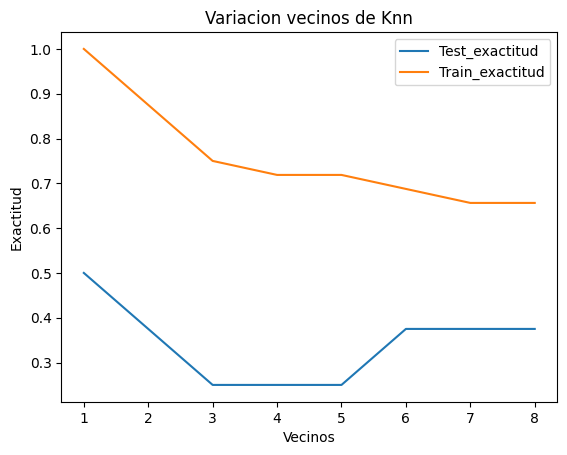

In [23]:
datos = pd.read_csv('vg1.csv')
datos = datos.replace(np.nan,'0')
df = pd.DataFrame(datos)

pred = dict(zip(datos.GenreEt.unique(), datos.Genre.unique()))# Unico que no se repiten

# Como se ve el diccionario
print(pred)

# print(datos['Genre'].value_counts)

X = datos[['NA_Sales','JP_Sales','Global_Sales']]
y = datos['GenreEt']

# Dividir en entrenamiento y preuba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# print(X_train.describe())
neighbors = np.arange(1,9)

train_exactitud=np.empty(len(neighbors))
test_exactitud=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train) # Ajustar el modelo
  train_exactitud[i] = knn.score(X_train,y_train)
  test_exactitud[i] = knn.score(X_test,y_test)

plt.title("Variacion vecinos de Knn")
plt.plot(neighbors,test_exactitud,label="Test_exactitud")
plt.plot(neighbors,train_exactitud,label="Train_exactitud")
plt.legend()
plt.xlabel("Vecinos")
plt.ylabel("Exactitud")
plt.show()


In [53]:
# Mejor KNN (ejemplo con k=2)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("Precisión KNN:", knn.score(X_test, y_test))

# Predicción con un nuevo dato (¡usar floats!)
pred1 = knn.predict([[9,4,23]])
print("Predicción KNN:", pred[pred1[0]])

# Random Forest
print("\nRandom Forest")
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Precisión RF:", rfc.score(X_test, y_test))

pred2 = rfc.predict([[9,4,23]])
print("Predicción Random Forest:", pred[pred2[0]])


Precisión KNN: 0.375
Predicción KNN: Role-Playing

Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier()